# 1. Informações gerais do banco de imagens

## 1.1 Todas as imagens possuem o mesmo tamanho?

In [1]:
import glob
import cv2
import pandas as pd

tamanhos = []
caminhos = glob.glob("PILL/*")

for caminho in caminhos:
    tamanho = cv2.imread(caminho).shape
    tamanhos.append((caminho, tamanho[0], tamanho[1]))

tamanhos[0:5]

[('PILL/00093-4069-01_PART_1_OF_1_CHAL10_SB_E126F0B7.jpg', 1600, 2400),
 ('PILL/00093-1063-01_PART_1_OF_1_CHAL10_SB_A029D07E.jpg', 1600, 2400),
 ('PILL/00078-0486-15_PART_1_OF_1_CHAL10_SB_E61D736B.jpg', 1600, 2400),
 ('PILL/00093-0926-06_PART_1_OF_1_CHAL10_SF_9826CC56.jpg', 1600, 2400),
 ('PILL/00093-7227-72_PART_1_OF_1_CHAL10_SF_CC306663.jpg', 1600, 2400)]

In [2]:
tamanhos = pd.DataFrame(tamanhos, columns=['path', 'width', 'height'])
tamanhos.head()

,path,width,height
0,PILL/00093-4069-01_PART_1_OF_1_CHAL10_SB_E126F...,1600,2400
1,PILL/00093-1063-01_PART_1_OF_1_CHAL10_SB_A029D...,1600,2400
2,PILL/00078-0486-15_PART_1_OF_1_CHAL10_SB_E61D7...,1600,2400
3,PILL/00093-0926-06_PART_1_OF_1_CHAL10_SF_9826C...,1600,2400
4,PILL/00093-7227-72_PART_1_OF_1_CHAL10_SF_CC306...,1600,2400


In [3]:
max(tamanhos['height']) == min(tamanhos['height']) \
and max(tamanhos['width']) == min(tamanhos['width'])

True

## 1.2 O cinza de fundo de todas as imagens é a mesma cor?

In [4]:
cinza = [118, 118, 118]

cor = True
for caminho in caminhos:
    if not (cv2.imread(caminho)[0][0] == cinza).all():
        cor = False
        break

cor

True

## 1.3 O quanto de cinza cada imagem possui?

Ou o tamanho das pílulas possui algum padrão?

In [5]:
import numpy as np

total_pixels = tamanhos.loc[0]['width'] * tamanhos.loc[0]['height']

percentual_cinzas = []

for caminho in caminhos:
    imagem = cv2.imread(caminho).reshape((-1, 3))
    total_cinza = np.sum(np.all(imagem == cinza, axis=1))
    percentual_cinza = total_cinza / total_pixels
    percentual_cinzas.append((caminho, percentual_cinza))

percentual_cinzas = pd.DataFrame(percentual_cinzas, columns=['path', 'percentage'])

percentual_cinzas.head()

,path,percentage
0,PILL/00093-4069-01_PART_1_OF_1_CHAL10_SB_E126F...,0.754319
1,PILL/00093-1063-01_PART_1_OF_1_CHAL10_SB_A029D...,0.819328
2,PILL/00078-0486-15_PART_1_OF_1_CHAL10_SB_E61D7...,0.805227
3,PILL/00093-0926-06_PART_1_OF_1_CHAL10_SF_9826C...,0.901388
4,PILL/00093-7227-72_PART_1_OF_1_CHAL10_SF_CC306...,0.805604


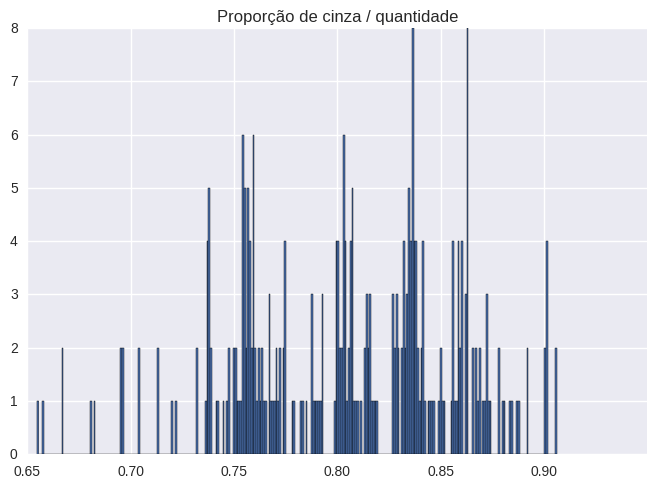

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

plt.title("Proporção de cinza / quantidade")
plt.hist(percentual_cinzas['percentage'], len(percentual_cinzas))
plt.show()

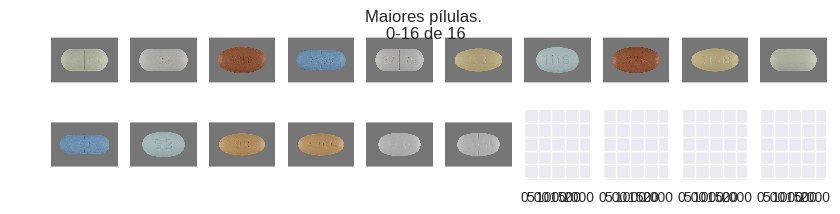

In [7]:
import util.show_images as show_images
from IPython.display import Image, display
import math

maiores_pilulas = percentual_cinzas[percentual_cinzas['percentage'] < 0.725]
show_images.show(maiores_pilulas['path'], title='Maiores pílulas')

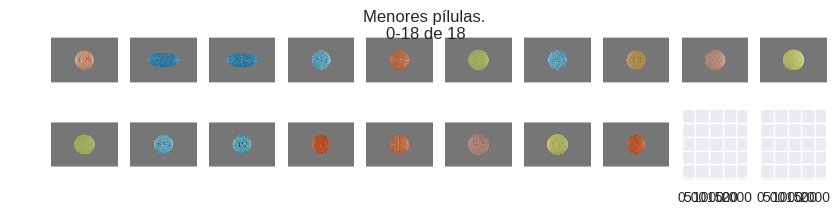

In [8]:
menores_pilulas = percentual_cinzas[percentual_cinzas['percentage'] > 0.875]
show_images.show(menores_pilulas['path'], title='Menores pílulas')

Pelo percentual de cinza, podemos perceber que é possível separar as pílulas grandes das pequenas. Entretanto, o formato das pílulas não é exclusivo do tamanho. Nas 18 menores pílulas ($total\_cinza > 0.875$) duas são compridas.

## 1.4 Existe uma área em comum para todas as pílulas?

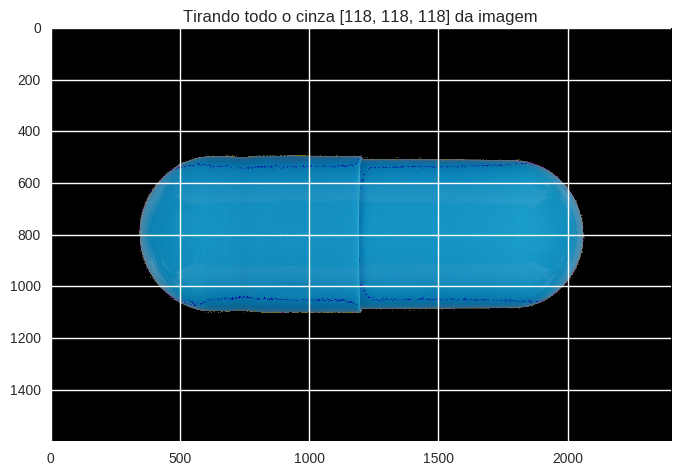

In [9]:
from skimage import img_as_ubyte

pilula = cv2.imread(caminhos[0])
pilula = cv2.cvtColor(pilula, cv2.COLOR_BGR2RGB)

plt.title('Tirando todo o cinza {} da imagem'.format(cinza))
plt.imshow(pilula & img_as_ubyte(pilula != cinza))

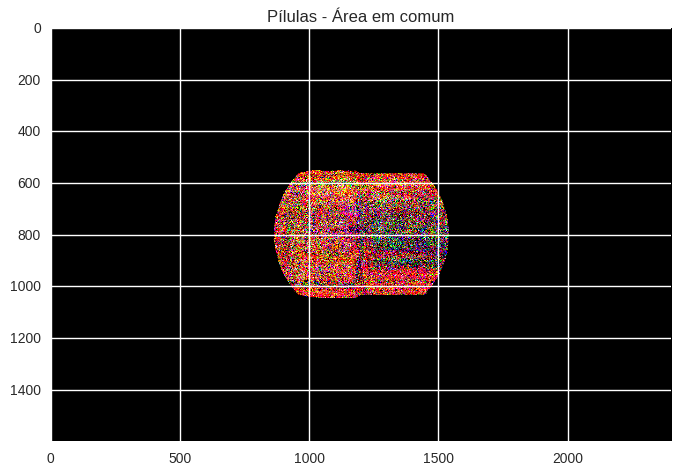

In [10]:
pilula = cv2.imread(caminhos[0])
mask = (pilula == cinza)

for path in caminhos[1:]:
    pilula = cv2.imread(path)
    pilula = cv2.cvtColor(pilula, cv2.COLOR_BGR2RGB)
    mask |= pilula == cinza

plt.title('Pílulas - Área em comum')
plt.imshow(~mask)

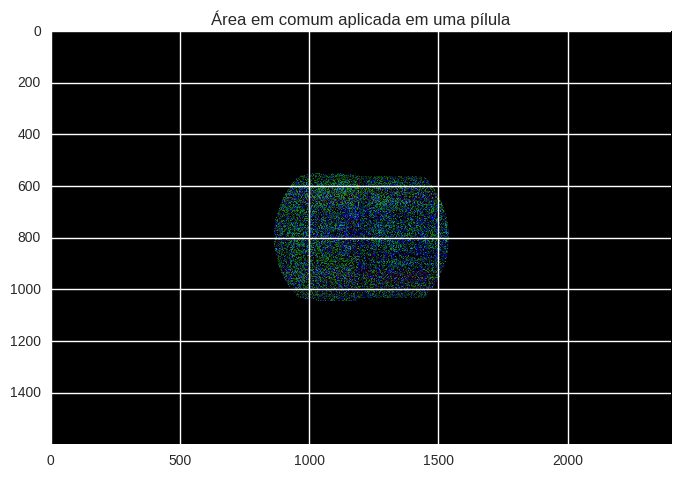

In [11]:
from skimage import img_as_ubyte

pilula = cv2.imread(caminhos[0])
pilula = cv2.cvtColor(pilula, cv2.COLOR_BGR2RGB)

plt.title('Área em comum aplicada em uma pílula')
plt.imshow(pilula & ~img_as_ubyte(mask))